<a href="https://colab.research.google.com/github/zaman69/deep_learning_codes-_projects/blob/main/DL_Project_5_face_Mask_Detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [3]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 74% 120M/163M [00:00<00:00, 1.25GB/s]
100% 163M/163M [00:00<00:00, 1.11GB/s]


In [4]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


**Importing the Dependencies**

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3007.jpg', 'with_mask_2743.jpg', 'with_mask_3245.jpg', 'with_mask_1420.jpg', 'with_mask_1959.jpg']
['with_mask_1958.jpg', 'with_mask_533.jpg', 'with_mask_388.jpg', 'with_mask_3295.jpg', 'with_mask_251.jpg']


In [8]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1849.jpg', 'without_mask_271.jpg', 'without_mask_1853.jpg', 'without_mask_2289.jpg', 'without_mask_2003.jpg']
['without_mask_3597.jpg', 'without_mask_973.jpg', 'without_mask_2590.jpg', 'without_mask_1182.jpg', 'without_mask_2966.jpg']


In [9]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [10]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [11]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [12]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [13]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

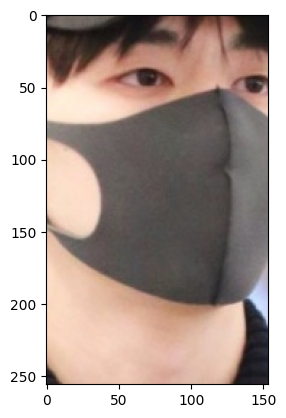

In [15]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1548.jpg')
imgplot = plt.imshow(img)
plt.show()

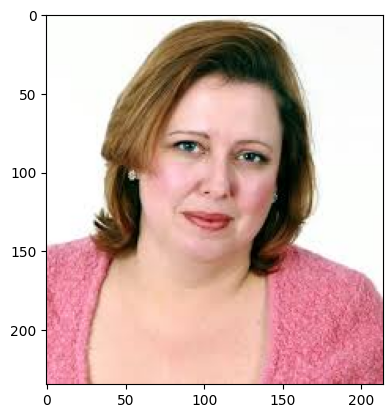

In [16]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2969.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [17]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [18]:
type(data)

list

In [19]:
len(data)

7553

array([[[255, 251, 239],
        [255, 251, 239],
        [255, 251, 239],
        ...,
        [255, 242, 226],
        [255, 242, 225],
        [255, 242, 224]],

       [[255, 251, 239],
        [255, 251, 239],
        [255, 251, 239],
        ...,
        [255, 242, 226],
        [255, 242, 225],
        [255, 242, 224]],

       [[255, 251, 239],
        [255, 251, 239],
        [255, 251, 239],
        ...,
        [255, 242, 226],
        [255, 242, 225],
        [255, 242, 224]],

       ...,

       [[234, 225, 206],
        [234, 226, 201],
        [230, 224, 185],
        ...,
        [237, 222, 196],
        [242, 227, 204],
        [241, 230, 208]],

       [[235, 223, 203],
        [234, 223, 196],
        [227, 218, 176],
        ...,
        [237, 222, 195],
        [242, 226, 202],
        [243, 229, 205]],

       [[238, 222, 200],
        [236, 221, 194],
        [225, 213, 172],
        ...,
        [238, 223, 195],
        [242, 226, 201],
        [243, 229, 203]]], dtype=uint8)
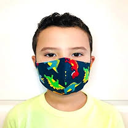

In [20]:
data[0]

In [21]:
type(data[0])

numpy.ndarray

In [22]:
data[0].shape

(128, 128, 3)

In [23]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [24]:
type(X)

numpy.ndarray

In [25]:
type(Y)

numpy.ndarray

In [26]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [27]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [29]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [30]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[ 24,  24,  24],
        [ 29,  29,  29],
        [ 26,  26,  26],
        ...,
        [ 25,  26,  28],
        [ 22,  23,  25],
        [ 19,  20,  22]],

       [[ 26,  26,  26],
        [ 28,  28,  28],
        [ 26,  26,  26],
        ...,
        [ 26,  28,  30],
        [ 21,  22,  24],
        [ 19,  20,  22]],

       [[ 25,  25,  25],
        [ 28,  28,  28],
        [ 25,  25,  25],
        ...,
        [ 24,  25,  27],
        [ 23,  24,  26],
        [ 21,  22,  24]],

       ...,

       [[247, 253, 254],
        [247, 254, 253],
        [246, 254, 252],
        ...,
        [ 48,  52,  58],
        [ 61,  65,  74],
        [ 53,  61,  70]],

       [[248, 252, 255],
        [248, 253, 255],
        [247, 254, 253],
        ...,
        [ 44,  50,  58],
        [ 47,  54,  64],
        [ 46,  56,  65]],

       [[250, 253, 254],
        [248, 252, 254],
        [250, 255, 255],
        ...,
        [ 42,  49,  58],
        [ 42,  51,  61],
        [ 32,  41,  53]]], dtype=uint8)
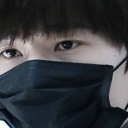

In [31]:
X_train[0]

In [32]:
X_train_scaled[0]

array([[[0.09411765, 0.09411765, 0.09411765],
        [0.11372549, 0.11372549, 0.11372549],
        [0.10196078, 0.10196078, 0.10196078],
        ...,
        [0.09803922, 0.10196078, 0.10980392],
        [0.08627451, 0.09019608, 0.09803922],
        [0.0745098 , 0.07843137, 0.08627451]],

       [[0.10196078, 0.10196078, 0.10196078],
        [0.10980392, 0.10980392, 0.10980392],
        [0.10196078, 0.10196078, 0.10196078],
        ...,
        [0.10196078, 0.10980392, 0.11764706],
        [0.08235294, 0.08627451, 0.09411765],
        [0.0745098 , 0.07843137, 0.08627451]],

       [[0.09803922, 0.09803922, 0.09803922],
        [0.10980392, 0.10980392, 0.10980392],
        [0.09803922, 0.09803922, 0.09803922],
        ...,
        [0.09411765, 0.09803922, 0.10588235],
        [0.09019608, 0.09411765, 0.10196078],
        [0.08235294, 0.08627451, 0.09411765]],

       ...,

       [[0.96862745, 0.99215686, 0.99607843],
        [0.96862745, 0.99607843, 0.99215686],
        [0.96470588, 0

**Building a Convolutional Neural Networks (CNN)**

In [33]:
import tensorflow as tf
from tensorflow import keras

In [34]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [36]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 14s 49ms/step - acc: 0.6489 - loss: 0.7456 - val_acc: 0.8694 - val_loss: 0.3045
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - acc: 0.8763 - loss: 0.3039 - val_acc: 0.8760 - val_loss: 0.2815
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.8856 - loss: 0.2657 - val_acc: 0.8777 - val_loss: 0.3117
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.9017 - loss: 0.2133 - val_acc: 0.9041 - val_loss: 0.2549
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9279 - loss: 0.1727 - val_acc: 0.9058 - val_loss: 0.2493


**Model Evaluation**

In [37]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - acc: 0.9167 - loss: 0.2077
Test Accuracy = 0.9159497022628784


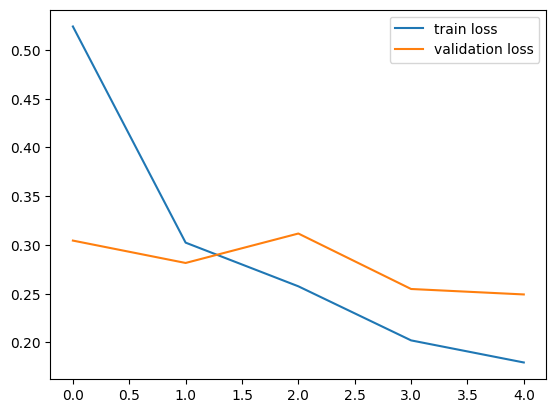

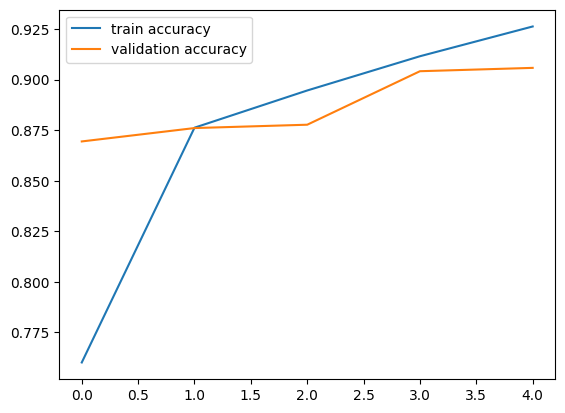

In [38]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/with_mask_me.jpg


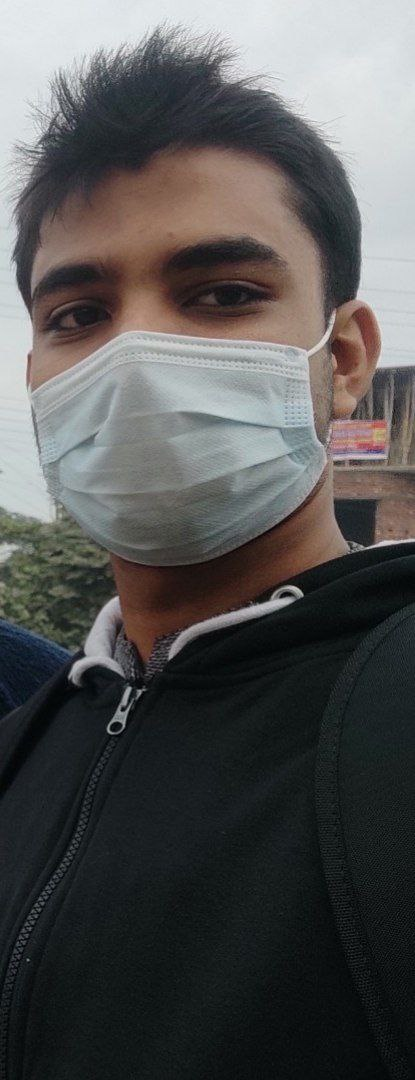

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 776ms/step
[[0.39279056 0.8468937 ]]
1
The person in the image is wearing a mask


In [39]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/data/without_mask/without_mask_100.jpg


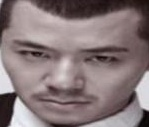

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
[[0.6418589  0.48195222]]
0
The person in the image is not wearing a mask


In [43]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Finally, I can say that as a complete beginner in machine learning, doing this project has helped me understand the overall concept and coding behind it. Though the accuracy for identifying whether an unknown image shows someone not wearing a mask is quite low, further optimization will contribute to the project's success, InshaAllah. After gathering initial insights from working on deep learning, if I have the opportunity in the future, I will focus on optimization. So far, it's been great work. Thank you to anyone who visits my repository.